In [1]:
# HIDDEN
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Joint Distributions ##

Suppose $X$ and $Y$ are two random variables defined on the same outcome space. We will use the notation $P(X = x, Y = y)$ for the probability that $X$ has the value $x$ and $Y$ has the value $y$. That is,

$$
P(X = x, Y = y) ~ = ~ P(\{ X=x \} \cap \{ Y=y \})
$$

The *joint distribution of $X$ and $Y$* consists of all the probabilities $P(X=x, Y=y)$ where $(x, y)$ ranges over all the possible values of $(X, Y)$.

#### Example ####
In three tosses of a coin, let $X$ be the number of heads in the first two tosses and $Y$ the number of heads in the last two tosses. Then 

$$
P(X = 0, Y = 2) = 0 = P(X = 2, Y = 0)
$$

$$
P(X = 1, Y = 1) = P(\text{THT or HTH}) = \frac{2}{8}
$$

All the other probabilities are $1/8$, as you can see by examining the six remaining outcomes of three tosses. For example,

$$
P(X = 1, Y = 2) = P(\text{THH}) = \frac{1}{8}
$$

The constraints on $x$ and $y$ are that each must be in the range $\{0, 1, 2\}$ and $\vert x - y \vert < 2$. 

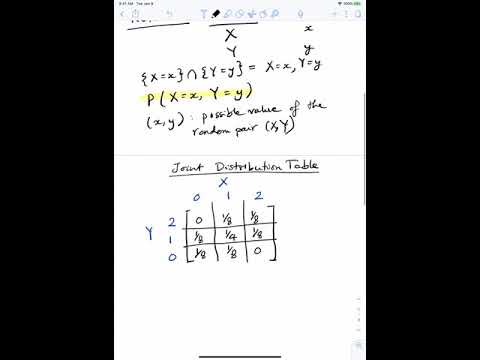

In [2]:
# VIDEO: Joint Distribution
from IPython.display import YouTubeVideo

YouTubeVideo("5utr7G2OXXA")

### Joint Distribution Table ###

The `prob140` library contains a method for displaying the joint distribution of two random variables. As a first step, you need the possible values of each of the two variables. In our example, both $X$ and $Y$ have values $\{0, 1, 2\}$ and so the same list or array will serve for both.

In [3]:
k = np.arange(3)

Now let's define a function that takes $x$ and $y$ as its arguments and returns $P(X = x, Y = y)$. We found the probabilities by counting, above.

In [4]:
def joint_probability(x, y):
    if x == 1 & y == 1:
        return 2/8
    elif abs(x - y) < 2:
        return 1/8
    else:
        return 0

The syntax for constructing a joint distribution object is analogous to that for constructing a univariate distribution, with some modifications due to the higher dimension. 

We have to specify the name of each of the two variables as well as its possible values, and then we will specify the function that we have defined to find the joint probabilities. The call is

`Table().values(variable_name_1, values_1, variable_name_2, values_2).probability_function(function_name)`

where `function_name` is a function that takes $x$ and $y$ as arguments and returns $P(X = x, Y = y)$.

In [5]:
joint_dist = Table().values('X', k, 'Y', k).probability_function(joint_probability)
joint_dist

,X=0,X=1,X=2
Y=2,0.000,0.125,0.125
Y=1,0.125,0.250,0.125
Y=0,0.125,0.125,0.000


This display of the joint distribution object `joint_dist` is called a *joint distribution table* for $X$ and $Y$. 

Each cell corresponds to a pair $(x, y)$, where $x$ is a value of $X$ and $y$ a value of $Y$. In the cell you see $P(X = x, Y = y)$, the probability of the pair $(x, y)$. 

Joint distribution tables are analogous to the contingency tables you saw in Data 8 when you were analyzing the relation between two categorical variables. In contingency tables, each cell contains the number of individuals in one particular pair of categories. In joint distribution tables, such as the one above, each cell contains the probability of one particular pair of values.

To check that we do indeed have a distribution over all the possible values of the pair $(X, Y)$, we can add up all the probabilities. The sum is 1, as it should be for a distribution.

In [6]:
joint_dist.total_probability()

1.0

In fact this is a double check, as the the method for constructing the joint distribution object returns an error if all the probabilities don't sum to 1.

### Finding Probabilities ###
The table contains complete information about the relation between $X$ and $Y$. To find the probabiilty of any event determined by $X$ and $Y$, simply identify the cells that make the event happen, and add up their chances. This is an application of the fundamental method of finding probabilities by partitioning an event.

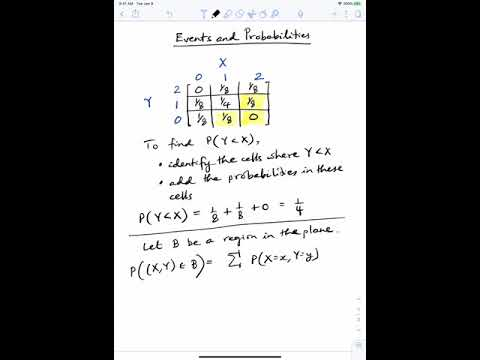

In [7]:
# VIDEO: Events and Probabilities
from IPython.display import YouTubeVideo

YouTubeVideo("ePADXFKYmh4")

For example, consider the event $\{ X = Y \}$ for $X$ and $Y$ as defined in our example above. The event can happen in three ways: if $X$ and $Y$ are both 0, or both 1, or both 2. So

$$
\begin{align*}
P(X = Y) &= P(X = 0, Y = 0) + P(X = 1, Y = 1) + P(X = 2 , Y = 2) \\
&= 0.125 + 0.25 + 0.125 \\
&= 0.5
\end{align*}
$$

Let's visualize this using the joint distribution table of $X$ and $Y$. To do this, we need a way of specifying the event $\{ X = Y \}$. 

We will use a method that is of fundamental importance to everything that follows in this course: we will define a function called the *indicator of the event*. The function just returns a Boolean: 1 if the event occurs, and 0 otherwise. In this example, for any pair $(i, j)$ it returns 1 if $i = j$ and 0 otherwise. 

In [8]:
def indicator_equal(i, j):
    return i == j         # Note the == sign. This is a comparison that results in a Boolean.

The `event` method applied to a joint distribution object allows us to visualize the event and also displays the probability of the event. The arguments are: 

- The name of a function that is the indicator of the event; it takes two arguments, say `a` and `b`, and returns the Boolean corresponding to whether or not the pair (`a`, `b`) is in the event
- The name of the random variable whose value is the first co-ordinate `a`
- The name of the random variable whose value is the second co-ordinate `b`

In [9]:
joint_dist.event(indicator_equal, 'X', 'Y')

P(Event) = 0.5


,X=0,X=1,X=2
Y=2,,,0.125
Y=1,,0.25,
Y=0,0.125,,


The display `P(event) = 0.5` is consistent with our earlier answer $P(X = Y) = 0.5$. In the table, probabilities are displayed only in the cells that are in the event, that is, only the cells $(x, y)$ for which $x = y$. 

You can see that these cells all lie along the $x = y$ diagonal line. The coordinate geometry will be visible again when we calculate $P(Y \ge X)$ below. 

However, if you just want to see the probability of the event without the table display, add a semicolon at the end of the line. That prevents the returned table from being printed.

In [10]:
joint_dist.event(indicator_equal, 'X', 'Y');

P(Event) = 0.5


In [11]:
def indicator_y_at_least_x(i, j):
    return j >= i

joint_dist.event(indicator_y_at_least_x, 'X', 'Y')

P(Event) = 0.75


,X=0,X=1,X=2
Y=2,0.000,0.125,0.125
Y=1,0.125,0.25,
Y=0,0.125,,


The visible cells form the upper triangle corresponding to points whose coordinates $(x, y)$ satisfy the the inequality $y \ge x$. The chance of the event is $P(Y \ge X) = 0.75$.

```{admonition} Quick Check
Without using Python, find $P(X+Y \ge 2)$.

```

```{admonition} Answer
:class: dropdown
$0.625$

```

### The General Calculation ###
As we have seen in these examples, saying that random variables $X$ and $Y$ satisfy a specified condition is the same as saying that the random point $(X, Y)$ falls in a particular region of the plane. In general, an *event determined by $X$ and $Y$* has the form "the point $(X, Y)$ is in a specified region $B$ of the plane". 

In the case of the event $\{ X = Y \}$ the region $B$ is the diagonal formed by points whose coordinates satisfy $x = y$.

In the case of the event $\{ Y \ge X \}$ the region $B$ is the upper triangle formed by the points whose coordinates satisfy $y \ge x$.

The probability of the event is $P((X,Y) \in B)$, which is obtained in two steps:

- Identify all pairs of possible values $(x, y)$ such that $(x, y) \in B$.
- Add the probabilities $P(X = x, Y = y)$ of all those pairs.

Expressed more compactly,

$$
P((X, Y) \in B) ~ = ~ \mathop{\sum \sum}_{(x,y) \in B} P(X = x, Y = y)
$$